In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset in panda's dataframe

df = pd.read_csv('churn raw data.csv')

# Exploratory Data Analysis

In [3]:
# let's see the dataset carefully
print(df.shape)
df.head()


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# identify any missing entries in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Basic statistical analysis
df.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# print out the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Separate the Independent variables (X) from dependent variable (y)
colsToDrop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns = colsToDrop, inplace = True)
y = df['Exited']
X = df.drop(columns = 'Exited')

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Train Test Split

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

# ZeroR classifier

In [11]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

Train Accuracy:  0.79625
Test Accuracy:  0.7965


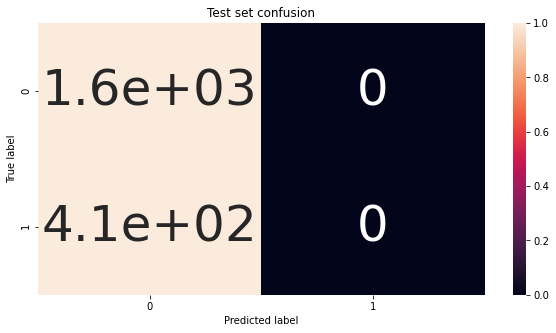

In [13]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

In [14]:
#Accuracy from the confusion matrix
(1.6e+3)/(1.6e+3 + 4.1e+2)

0.7960199004975125

# K-Nearest Neighbor

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Pre-Processing

In [16]:
#We need to provide numerical representations to categotical attributes 
df = pd.get_dummies(df, columns = ['Geography'])

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
# We will use the label encoder to encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] =le.fit_transform(df['Gender']) 

In [19]:
print(df.shape)
df.head(10)

(10000, 13)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [20]:
#Let's now split the dataset in the same way we have done for ZeroR classifier
y = df['Exited']
X = df.drop(columns = 'Exited')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [21]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [22]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
4198,0.524,1,0.229730,0.1,0.000000,0.000000,1,1,0.416034,0,0,1
5227,0.702,1,0.067568,0.3,0.000000,0.333333,1,0,0.194447,1,0,0
5677,0.610,1,0.189189,0.9,0.452164,0.000000,1,0,0.410171,0,1,0
5957,0.524,1,0.783784,0.6,0.383291,0.000000,1,1,0.956983,0,1,0
804,1.000,1,0.283784,0.4,0.509256,0.333333,0,1,0.758613,1,0,0


In [23]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
938,0.454,0,0.256757,0.4,0.000000,0.000000,1,1,0.399151,1,0,0
8754,0.852,0,0.337838,0.4,0.000000,0.333333,0,1,0.810633,1,0,0
4028,0.226,0,0.310811,0.8,0.490843,0.333333,1,0,0.350360,0,1,0
6539,0.694,0,0.364865,0.1,0.000000,0.333333,1,0,0.233702,1,0,0
320,0.350,0,0.527027,0.2,0.581771,0.000000,1,1,0.321949,0,0,1


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.64      0.33      0.43       407

    accuracy                           0.83      2000
   macro avg       0.74      0.64      0.66      2000
weighted avg       0.80      0.83      0.80      2000

Train Accuracy:  0.863
Test Accuracy:  0.8255


In [25]:
k = range(1, 60)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x, metric = 'minkowski', p = 2) # Euclidean Distance Metric
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, knn_clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, y_pred))
    
    

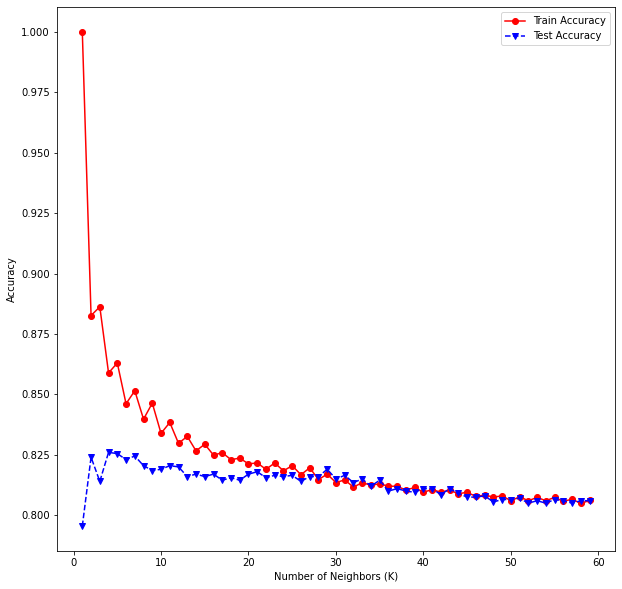

In [26]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [27]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7955 Difference =  20.450000000000003 %
Number of neighbors =  2 Train accuracy =  0.882625 Test Accuracy =  0.824 Difference =  5.862500000000004 %
Number of neighbors =  3 Train accuracy =  0.88625 Test Accuracy =  0.814 Difference =  7.225000000000003 %
Number of neighbors =  4 Train accuracy =  0.858875 Test Accuracy =  0.826 Difference =  3.28750000000001 %
Number of neighbors =  5 Train accuracy =  0.863 Test Accuracy =  0.8255 Difference =  3.749999999999998 %
Number of neighbors =  6 Train accuracy =  0.846125 Test Accuracy =  0.823 Difference =  2.312500000000006 %
Number of neighbors =  7 Train accuracy =  0.8515 Test Accuracy =  0.8245 Difference =  2.7000000000000024 %
Number of neighbors =  8 Train accuracy =  0.83975 Test Accuracy =  0.8205 Difference =  1.924999999999999 %
Number of neighbors =  9 Train accuracy =  0.846375 Test Accuracy =  0.8185 Difference =  2.7874999999999983 %
Number of neighbors =  1